In [74]:
#
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris=load_iris()
X=iris.data[:,(2,3)]
y=(iris.target==0).astype(np.int)

per_clf=Perceptron()
per_clf.fit(X,y)

y_pred=per_clf.predict([[2,0.5]])
from tensorflow import keras
import tensorflow as tf
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.
keras.backend.clear_session()  ##グローバル状態解法され、レイヤーが一文字化する
np.random.seed(42)
tf.random.set_seed(42)
hidden1=model.layers[1]
model.get_layer("dense") is hidden1

weights,biases=hidden1.get_weights()
weights
weights.shape
biases, biases.shape

model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd",
                metrics=["accuracy"]
        )


history=model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))
#model.fit(X_train,y_train,epochs=30,validation_data=(X_valid,y_valid))
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_proba=model.predict(X_new)
y_proba.round(2)
y_pred=model.predict_classes(X_new)
y_pred
np.array(class_names)[y_pred]
y_new=y_test[:3]
y_new



Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0187 - accuracy: 0.6805 - val_loss: 0.5213 - val_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5027 - accuracy: 0.8262 - val_loss: 0.4348 - val_accuracy: 0.8534
Epoch 3/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4484 - accuracy: 0.8426 - val_loss: 0.5347 - val_accuracy: 0.7982
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4208 - accuracy: 0.8526 - val_loss: 0.3917 - val_accuracy: 0.8646
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4062 - accuracy: 0.8583 - val_loss: 0.3744 - val_accuracy: 0.8694
Epoch 6/30
 307/1719 [====>.........................] - ETA: 6s - loss: 0.3710 - accuracy: 0.8672

KeyboardInterrupt: 

In [75]:
##10.2.3 MLP regression
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing=fetch_california_housing()

X_train_full,X_test,y_train,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

model= keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
history=model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=20)

mse_test=model.evaluate(X_test,y_test)
X_new=X_test[:3]
y_pred=model.predict(X_new)


Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1465 - val_loss: 0.8776
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7658 - val_loss: 0.4970
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4732 - val_loss: 0.4692
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4492 - val_loss: 0.4594
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4215 - val_loss: 0.4495
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4276 - val_loss: 0.4425
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4152 - val_loss: 0.4318
Epoch 8/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4072 - val_loss: 0.4311
Epoch 9/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4053 - val_loss: 0.4230
Epoch 10/20
363/363 [==============================] - 1s 1ms/step - loss: 0.4008 - val_loss: 0.4195

In [24]:
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
import tensorflow as tf

housing=fetch_california_housing()
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

print(X_train.shape)

#input_=keras.layers.Input(shape=X_train.shape[1:])
#hidden1=keras.layers.Dense(30,activation="relu")(input_)
##hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
#concat=keras.layers.Concatenate()([input_,hidden2])
#output=keras.layers.Dense(1)(concat)
#model=keras.Model(inputs=[input_],outputs=[output])
#model.compile(loss="mean_squared_error",optimizer="sgd")
#history=model.fit(X_train,y_train,epochs=20,validation_data=(X_valid,y_valid))
#mse_test=model.evaluate(X_test,y_test)
#mse_test


input_A=keras.layers.Input(shape=[5],name="wide_input")
input_B=keras.layers.Input(shape=[6],name="deep_input")
hidden1=keras.layers.Dense(30,activation="relu")(input_B)
hidden2=keras.layers.Dense(30,activation="relu")(hidden1)
concat=keras.layers.Concatenate()([input_A,hidden2])
#output=keras.layers.Dense(1,name="output")(concat)##補助出力なし
output=keras.layers.Dense(1,name="main_output")(concat)
aux_output=keras.layers.Dense(1,name="aux_output")(hidden2)
#model=keras.Model(inputs=[input_A,input_B],outputs=[output])##補助出力なし
model=keras.Model(inputs=[input_A,input_B],outputs=[output,aux_output])
#model.compile(loss="mse",optimizer=keras.optimizers.SGD(lr=1e-3))#補助出力なし
model.compile(loss=["mse","mse"],loss_weights=[0.9,0.1],optimizer=keras.optimizers.SGD(lr=1e-3))
X_train_A,X_train_B=X_train[:,:5],X_train[:,2:]
X_valid_A,X_valid_B=X_valid[:,:5],X_valid[:,2:]
X_test_A,X_test_B=X_test[:,:5],X_test[:,2:]

X_new_A,X_new_B=X_train_A[:3],X_train_B[:3]

#history = model.fit((X_train_A, X_train_B),y_train,epochs=20,validation_data=((X_valid_A,X_valid_B),y_valid))#補助出力なし
history = model.fit([X_train_A, X_train_B],[y_train,y_train],epochs=20,validation_data=([X_valid_A,X_valid_B],[y_valid,y_valid]))
#mse_test=model.evaluate((X_test_A,X_test_B),y_test)#単一出力のみ
total_loss,main_loss,aux_loss=model.evaluate([X_test_A,X_test_B],[y_test,y_test])
#y_pred=model.predict((X_new_A,X_new_B))
y_pred_main,y_pred_aux=model.predict([X_new_A,X_new_B])

class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu",**kwargs):
        super().__init__(**kwargs)
        super().__init__(**kwargs)
        self.hidden1=keras.layers.Dense(units,activation=activation)
        self.hidden2=keras.layers.Dense(units,activation=activation)
        self.main_output=keras.layers.Dense(1)
        self.aux_output=keras.layers.Dense(1)
        
    def call(self,inputs):
        input_A,input_B=inputs
        hidden1=self.hidden1(input_B)
        hidden2=self.hidden2(hidden1)
        concat=keras.layers.concatenate([input_A,hidden2])
        main_output=self.main_output(hidden2)
        aux_output=self.aux_output(hidden2)
        return main_output,aux_output
    
#model=WideAndDeepModel()   
        
model.save("my_first_keras_model.h5")    
moedl=keras.models.load_model("my_first_keras_model.h5")  ##summary()で呼び出す
    

(11610, 8)
Epoch 1/20
363/363 [==============================] - 2s 2ms/step - loss: 3.1082 - main_output_loss: 2.7984 - aux_output_loss: 5.8964 - val_loss: 1.2498 - val_main_output_loss: 0.9318 - val_aux_output_loss: 4.1117
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 1.1638 - main_output_loss: 0.8780 - aux_output_loss: 3.7358 - val_loss: 0.9301 - val_main_output_loss: 0.7288 - val_aux_output_loss: 2.7417
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.8732 - main_output_loss: 0.7026 - aux_output_loss: 2.4091 - val_loss: 0.8271 - val_main_output_loss: 0.6854 - val_aux_output_loss: 2.1027
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7968 - main_output_loss: 0.6715 - aux_output_loss: 1.9242 - val_loss: 0.7706 - val_main_output_loss: 0.6574 - val_aux_output_loss: 1.7898
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7586 - main_output_loss: 0.6578 - aux_output_loss: 1.6657

AttributeError: 'Functional' object has no attribute 'info'

In [32]:
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
import tensorflow as tf

housing=fetch_california_housing()
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

model= keras.models.Sequential([
    keras.layers.Dense(30,activation="relu",input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error",optimizer="sgd")
model.save("my_keras_model.h5")
moedl=keras.models.load_model("my_keras_model.h5")
model.summary()

checkpoint_cb=keras.callbacks.ModelCheckpoint("my_keras_model.h5",
                                              save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_valid, y_valid),callbacks=[checkpoint_cb])
model=keras.models.load_model("my_keras_model.h5")

early_stopping_cb=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[checkpoint_cb,early_stopping_cb])

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        print("\nval/train:{:2f}".format(logs["val_loss"]/logs["loss"]))
        
model.summary()       



    

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_52 (Dense)             (None, 30)                270       
_________________________________________________________________
dense_53 (Dense)             (None, 1)                 31        
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 1.5976 - val_loss: 1.3161
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7265 - val_loss: 0.4737
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4800 - val_loss: 0.4483
Epoch 4/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4696 - val_loss: 0.4241
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4411 - val_loss: 0.4125
Epoch 6/10
363/363

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 1s 2ms/step - loss: 0.4910 - val_loss: 0.4656

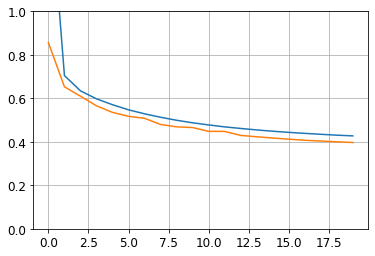

Epoch 1/30
363/363 [==============================] - 4s 10ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 1s 4ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 1s 3ms/step - loss: 0.4549 - val_loss: 0.437

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

Epoch 1/30
363/363 [==============================] - 2s 5ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3697 - val_l

In [18]:
##10.2.8
# Setup


# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

y_pred
# TensorBoard

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])



%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

run_logdir2 = get_run_logdir()
run_logdir2

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])



In [1]:
from sklearn.datasets import fetch_california_housing
from tensorflow import keras
import tensorflow as tf
import numpy as np

housing=fetch_california_housing()
from sklearn.model_selection import train_test_split
X_train_full,X_test,y_train_full,y_test=train_test_split(housing.data,housing.target)
X_train,X_valid,y_train,y_valid=train_test_split(X_train_full,y_train_full)

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_valid=scaler.transform(X_valid)
X_test=scaler.transform(X_test)

def build_model(n_hidden=1,n_neurons=30,learning_rate=3e-3,input_shape=[8]):
    model=keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer=keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse",optimizer=optimizer)
    return model

keras_reg=keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid),callbacks=[keras.callbacks.EarlyStopping(patience=10)])
mse_test=keras_reg.score(X_test,y_test)
X_new=X_train[:3]
y_pred=keras_reg.predict(X_new)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs ={
    "n_hidden": [0, 1, 2, 3],
    "n_neurons":np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2)
}
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100).tolist(),
    "learning_rate": np.arange(3e-4, 3e-2).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3)
rnd_search_cv.fit(X_train,y_train,epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

rnd_search_cv.best_params_,rnd_search_cv.best_params_


Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 2.4559 - val_loss: 0.6857
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.6124 - val_loss: 0.6204
Epoch 3/100
363/363 [==============================] - 1s 1ms/step - loss: 0.5577 - val_loss: 0.5725
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5025 - val_loss: 0.5668
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4965 - val_loss: 0.5207
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4719 - val_loss: 0.5453
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4859 - val_loss: 0.4960
Epoch 8/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4597 - val_loss: 0.5066
Epoch 9/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4407 - val_loss: 0.4787
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4284 - val_lo

KeyboardInterrupt: 

1719/1719 [==============================] - 7s 4ms/step - loss: 438485786096392863744.0000 - accuracy: 0.4922 - val_loss: 2.3911 - val_accuracy: 0.1126
Epoch 1/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4177 - accuracy: 0.8705 - val_loss: 0.1056 - val_accuracy: 0.9672
Epoch 2/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0950 - accuracy: 0.9706 - val_loss: 0.0931 - val_accuracy: 0.9732
Epoch 3/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0670 - accuracy: 0.9787 - val_loss: 0.0721 - val_accuracy: 0.9790
Epoch 4/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0440 - accuracy: 0.9857 - val_loss: 0.0750 - val_accuracy: 0.9806
Epoch 5/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0345 - accuracy: 0.9885 - val_loss: 0.0722 - val_accuracy: 0.9822
Epoch 6/100
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0260 - accuracy: 0.9917 - val_loss: 0.0685 

[0.06831685453653336, 0.9794999957084656]

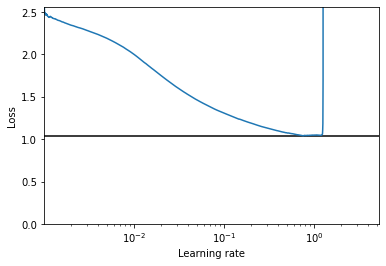

In [16]:
##Q10
from tensorflow import keras
import tensorflow as tf
import numpy as np
#from keras.datasets.mnist import load_data

(X_train_full,y_train_full),(X_test,y_test)=keras.datasets.mnist.load_data()

X_valid,X_train=X_train_full[:5000]/255.,X_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
X_test=X_test/255.


K=keras.backend
class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor=factor
        self.rates=[]
        self.losses=[]
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr*self.factor)
        
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)
model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
    ])

model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"],
            )

expon_lr=ExponentialLearningRate(factor=1.005)

history=model.fit(X_train,y_train,
                  validation_data=(X_valid,y_valid),epochs=1,
                 callbacks=[expon_lr])

import matplotlib.pyplot as plt
plt.plot(expon_lr.rates,expon_lr.losses)
plt.gca().set_xscale("log")
#plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
#plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0,
#          expon_lr.losses[0]])
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0,
          expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")

#model.evaluate(X_test,y_test)

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model=keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=2e-1),
             metrics=["accuracy"])


early_stopping_cb=keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb=keras.callbacks.ModelCheckpoint("my_mnist_model.h5",
                                             save_best_only=True)

history=model.fit(X_train,y_train,
                  validation_data=(X_valid,y_valid),epochs=100,
                 callbacks=[early_stopping_cb,checkpoint_cb])


model=keras.models.load_model("my_mnist_model.h5")

model.evaluate(X_test,y_test)









Saving figure perceptron_iris_plot


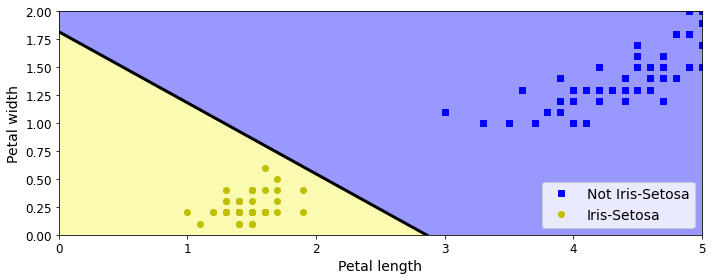

Saving figure activation_functions_plot


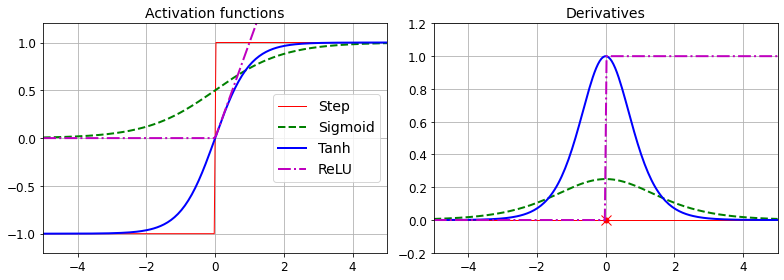

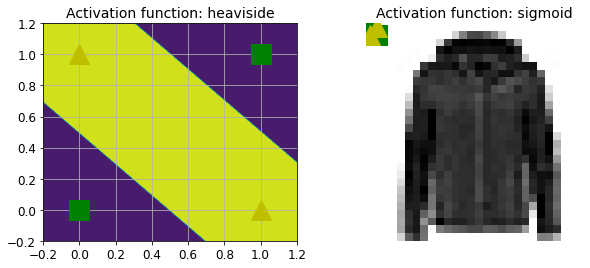

Saving figure fashion_mnist_plot


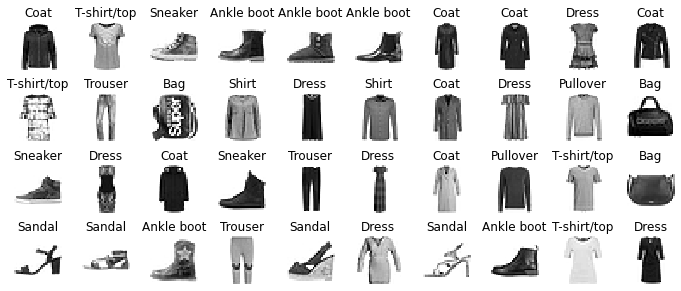

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0187 - sparse_categorical_accuracy: 0.6805 - val_loss: 0.5213 - val_sparse_categorical_accuracy: 0.8226
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/ste

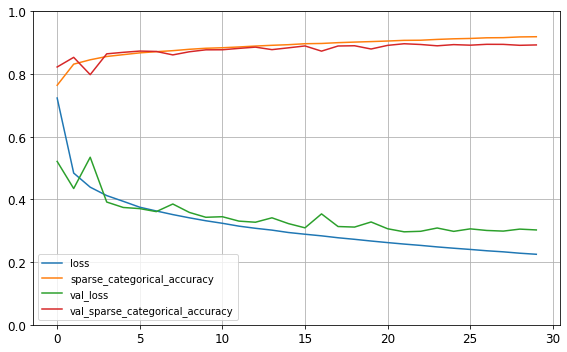

313/313 [==============================] - 1s 2ms/step - loss: 0.3374 - sparse_categorical_accuracy: 0.8825
Saving figure fashion_mnist_images_plot


C:\Users\a.sakata\AppData\Roaming\Python\Python37\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


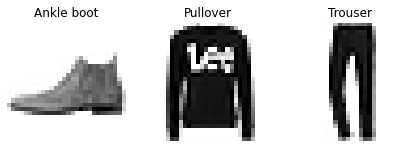

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 1s 2ms/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4910 - val_loss: 0.4656

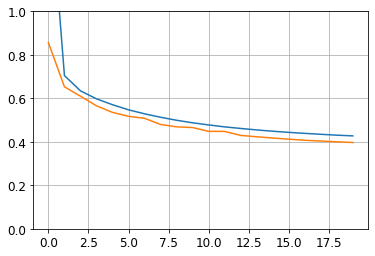

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_5 (Dense)                 (None, 30)           270         input_1[0][0]                    
__________________________________________________________________________________________________
dense_6 (Dense)                 (None, 30)           930         dense_5[0][0]                    
__________________________________________________________________________________________________
concatenate (Concatenate)       (None, 38)           0           input_1[0][0]                    
                                                                 dense_6[0][0]                

162/162 [==============================] - 0s 2ms/step - loss: 0.4382
Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 3ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 1s 2ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 2ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [=========

Epoch 63/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3427 - val_loss: 0.3290
Epoch 64/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3212 - val_loss: 0.3217
Epoch 65/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3374 - val_loss: 0.3351
Epoch 66/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3323 - val_loss: 0.3232
Epoch 67/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3470 - val_loss: 0.3566
Epoch 68/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3316 - val_loss: 0.3257
Epoch 69/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3354 - val_loss: 0.3348
Epoch 70/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3316 - val_loss: 0.3560
Epoch 71/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3371 - val_loss: 0.3583
Epoch 72/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3201

ERROR: Could not find `tensorboard`. Please ensure that your PATH
contains an executable `tensorboard` program, or explicitly specify
the path to a TensorBoard binary by setting the `TENSORBOARD_BINARY`
environment variable.

Epoch 1/30
363/363 [==============================] - 2s 4ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 1s 1ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 1s 1ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3697 - val_l

In [24]:



# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

# Perceptrons

import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

y_pred

a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()

# Activation functions

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()

def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)
plt.grid(True)

# Building an Image Classifier

import tensorflow as tf
from tensorflow import keras

tf.__version__

keras.__version__


fashion_mnist = keras.datasets.fashion_mnist

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

X_train_full.shape


X_train_full.dtype


X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()


y_train


class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]


class_names[y_train[0]]


X_valid.shape

X_test.shape


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.layers

model.summary()

keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

hidden1 = model.layers[1]
hidden1.name

model.get_layer(hidden1.name) is hidden1

weights, biases = hidden1.get_weights()

weights

weights.shape

biases

biases.shape

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])



model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])


history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

history.params

print(history.epoch)

history.history.keys()

import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
save_fig("keras_learning_curves_plot")
plt.show()

model.evaluate(X_test, y_test)

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

y_pred = model.predict_classes(X_new)
y_pred

np.array(class_names)[y_pred]

y_new = y_test[:3]
y_new

plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

y_pred

# Functional API


np.random.seed(42)
tf.random.set_seed(42)

input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

model.summary()

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)


np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))


np.random.seed(42)
tf.random.set_seed(42)

input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

# The subclassing API

class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

model = WideAndDeepModel(30, activation="relu")

# Saving and Restoring

np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

model.save("my_keras_model.h5")

model = keras.models.load_model("my_keras_model.h5")

model.predict(X_new)

model.save_weights("my_keras_weights.ckpt")

model.load_weights("my_keras_weights.ckpt")

# Using Callbacks during Training

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") # rollback to best model
mse_test = model.evaluate(X_test, y_test)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

# TensorBoard

root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])


%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

run_logdir2 = get_run_logdir()
run_logdir2

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])


